In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Conv2D
import random

2025-09-23 08:31:55.442641: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-23 08:32:21.441095: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
import cv2

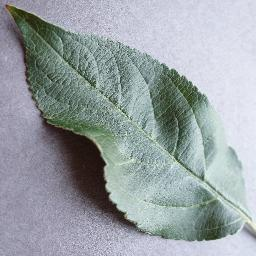

In [3]:
img =  image.load_img('/home/john/Documents/weeding/test/0bc2127e-99b9-44ea-bb2b-4e1b0b0f7624___RS_HL 7777.JPG')
img

In [4]:
cv2.imread('/home/john/Documents/weeding/test/0bc2127e-99b9-44ea-bb2b-4e1b0b0f7624___RS_HL 7777.JPG').shape


(256, 256, 3)

In [5]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset = train.flow_from_directory('/home/john/Documents/weeding/train',
                                          target_size = (200,200),
                                          batch_size = 64,
                                          class_mode = 'categorical' )

validation_dataset = validation.flow_from_directory('/home/john/Documents/weeding/validation',
                                                    target_size = (200, 200),
                                                    batch_size = 64,
                                                    class_mode = 'categorical')

Found 1409 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [7]:
train_dataset.class_indices
validation_dataset.class_indices

{'greens': 0, 'tomato': 1}

In [8]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,), dtype=int32)

In [9]:
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [10]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),  # Layer 1
    MaxPooling2D((2, 2)),                                             # Layer 2
    
    Flatten(),                                                        # Layer 3
    Dense(2, activation='softmax')                                    # Layer 4
])

/home/john/Documents/weeding/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-23 08:32:31.817847: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
# Display a summary of the model
# model.summary()
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',           # Watch validation loss
    mode='min',                   # Stop when validation loss stops decreasing
    patience=3,                   # Allow 3 epochs of no improvement
    restore_best_weights=True     # Restore weights from the best epoch
)


In [12]:
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

Epoch 1/2
23/23 ━━━━━━━━━━━━━━━━━━━━ 210s 9s/step - accuracy: 0.7814 - loss: 0.5971 - val_accuracy: 0.8354 - val_loss: 0.4471
Epoch 2/2
23/23 ━━━━━━━━━━━━━━━━━━━━ 263s 10s/step - accuracy: 0.8644 - loss: 0.3821 - val_accuracy: 0.9146 - val_loss: 0.2462


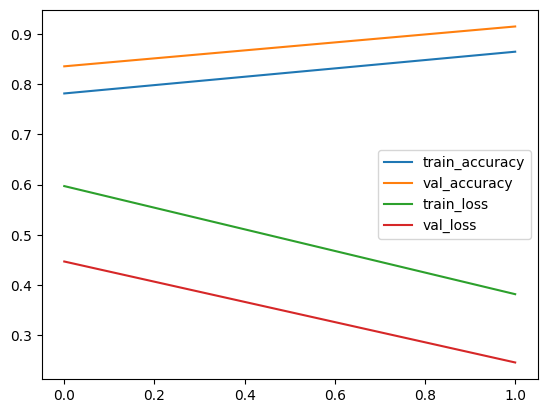

In [14]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
# Train the model with EarlyStopping
history = model.fit(
    train_dataset,
    epochs=2,
    validation_data=validation_dataset,
    callbacks=[early_stopping]    # Pass EarlyStopping as a callback
)

# plotting accuracy against loss
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Loss
# plt.plot(history.history['loss'], label='train_loss')
# plt.plot(history.history['val_loss'], label='val_loss')


In [15]:
model.evaluate(validation_dataset)

3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.9146 - loss: 0.2462


[0.24619895219802856, 0.9146341681480408]

In [16]:
class_labels = {v: k for k, v in train_dataset.class_indices.items()}
print(class_labels)

{0: 'greens', 1: 'tomato'}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[1.167234e-04 9.998833e-01]]


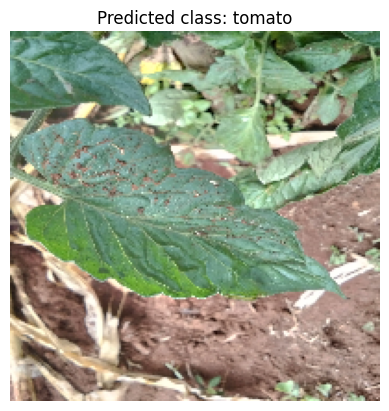

In [81]:

test_dir_path = r'/home/john/Documents/weeding/test'
images  = os.listdir(test_dir_path)
random_image = random.choice(images)
image_path = os.path.join(test_dir_path, random_image)

img = image.load_img(image_path, target_size=(200, 200))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)
print(prediction)
plt.imshow(img)
plt.axis('off')
predicted_class = np.argmax(prediction)
plt.title(f"Predicted class: {class_labels[predicted_class]}")
plt.show()

Uploading an Image 


In [83]:
model.save('weeder1.h5') 

In [84]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # Convert your Keras model
tflite_model = converter.convert()  # Convert to TFLite format

# Save the TFLite model
with open('weeder1.tflite', 'wb') as f:
    f.write(tflite_model)  # This writes the TFLite model to your file system

INFO:tensorflow:Assets written to: /tmp/tmpapfbztd7/assets


INFO:tensorflow:Assets written to: /tmp/tmpapfbztd7/assets


Saved artifact at '/tmp/tmpapfbztd7'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  132899144341200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132899144342352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132899144341968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132899144341008: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1758607261.370522   13990 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1758607261.469655   13990 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-09-23 09:01:02.432897: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpapfbztd7
2025-09-23 09:01:02.497646: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-09-23 09:01:02.497758: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpapfbztd7
I0000 00:00:1758607263.119047   13990 mlir_graph_optimization_pass.cc:437] MLIR V1 optimization pass is not enabled
2025-09-23 09:01:03.248799: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-09-23 09:01:04.285120: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpapfbztd7
2025-09-23 09:01:04.333256: I tensorflow/cc/saved_model/loader.cc:471] SavedModel 